In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV
df = pd.read_csv("C:/Proyecto_Final/DataSetFinal.csv")

# Verifica las primeras filas del DataFrame para asegurarte de que se cargó correctamente
print(df.head())

             Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  2018-01-01 00:00:00           380.047791          5.311336   
1  2018-01-01 00:10:00           453.769196          5.672167   
2  2018-01-01 00:20:00           306.376587          5.216037   
3  2018-01-01 00:30:00           419.645905          5.659674   
4  2018-01-01 00:40:00           380.650696          5.577941   

   Wind Direction (°)  Theoretical_Power_Curve (kW)  
0          259.994904                     41.632891  
1          268.641113                     51.991751  
2          272.564789                     39.090002  
3          271.258087                     51.612757  
4          265.674286                     49.170297  


In [5]:
# Realizar el Análisis Exploratorio de Datos (EDA):
# Estadísticas Descriptivas
print(df.describe())

       LV ActivePower (kW)  Wind Speed (m/s)  Wind Direction (°)  \
count         50530.000000      50530.000000        50530.000000   
mean           1307.684332          7.547758          123.687559   
std            1312.459242          4.195567           93.443736   
min              -2.471405          0.000000            0.000000   
25%              50.677890          4.201395           49.315437   
50%             825.838074          7.104594           73.712978   
75%            2482.507568         10.300020          201.696720   
max            3618.732910         19.447957          359.997589   

       Theoretical_Power_Curve (kW)  
count                  50530.000000  
mean                     149.217546  
std                      136.801824  
min                        0.000000  
25%                       16.132817  
50%                      106.377628  
75%                      296.497246  
max                      360.000000  


In [7]:
# Asegurarse de que la columna de fecha esté en formato datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Número de filas por día (10 minutos x 144 = 24 horas)
rows_per_day = 144

# Agrupar cada 144 filas (un día) y calcular la media de las columnas numéricas
daily_avg = df.groupby(df.index // rows_per_day).mean(numeric_only=True)

# Tomar la primera fecha de cada grupo como índice representativo
daily_avg['Fecha'] = df.groupby(df.index // rows_per_day)['Date/Time'].first().values
daily_avg.set_index('Fecha', inplace=True)

# Mostrar resultado
print(daily_avg.head())


                     LV ActivePower (kW)  Wind Speed (m/s)  \
Fecha                                                        
2018-01-01 00:00:00          1535.204483          8.022975   
2018-01-02 00:00:00          3182.564250         12.000548   
2018-01-03 00:00:00          1017.793340          6.650189   
2018-01-04 00:00:00           825.671676          6.235988   
2018-01-05 02:50:00            34.016727          2.481720   

                     Wind Direction (°)  Theoretical_Power_Curve (kW)  
Fecha                                                                  
2018-01-01 00:00:00          229.735242                    162.299005  
2018-01-02 00:00:00          197.859789                    331.469347  
2018-01-03 00:00:00          192.476045                    107.295636  
2018-01-04 00:00:00          113.937499                     82.756030  
2018-01-05 02:50:00          172.863920                      4.225985  


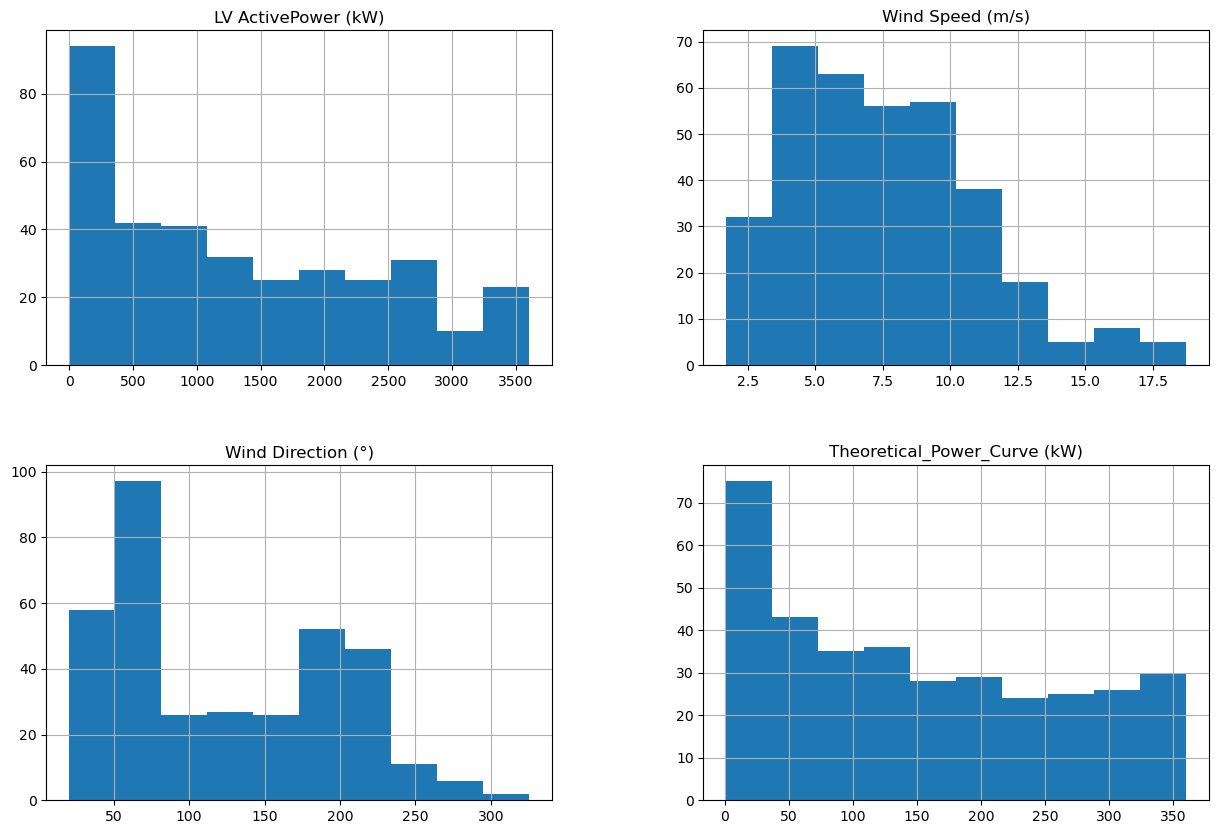

In [9]:
# Histogramas
daily_avg.hist(figsize=(15, 10))
plt.show()

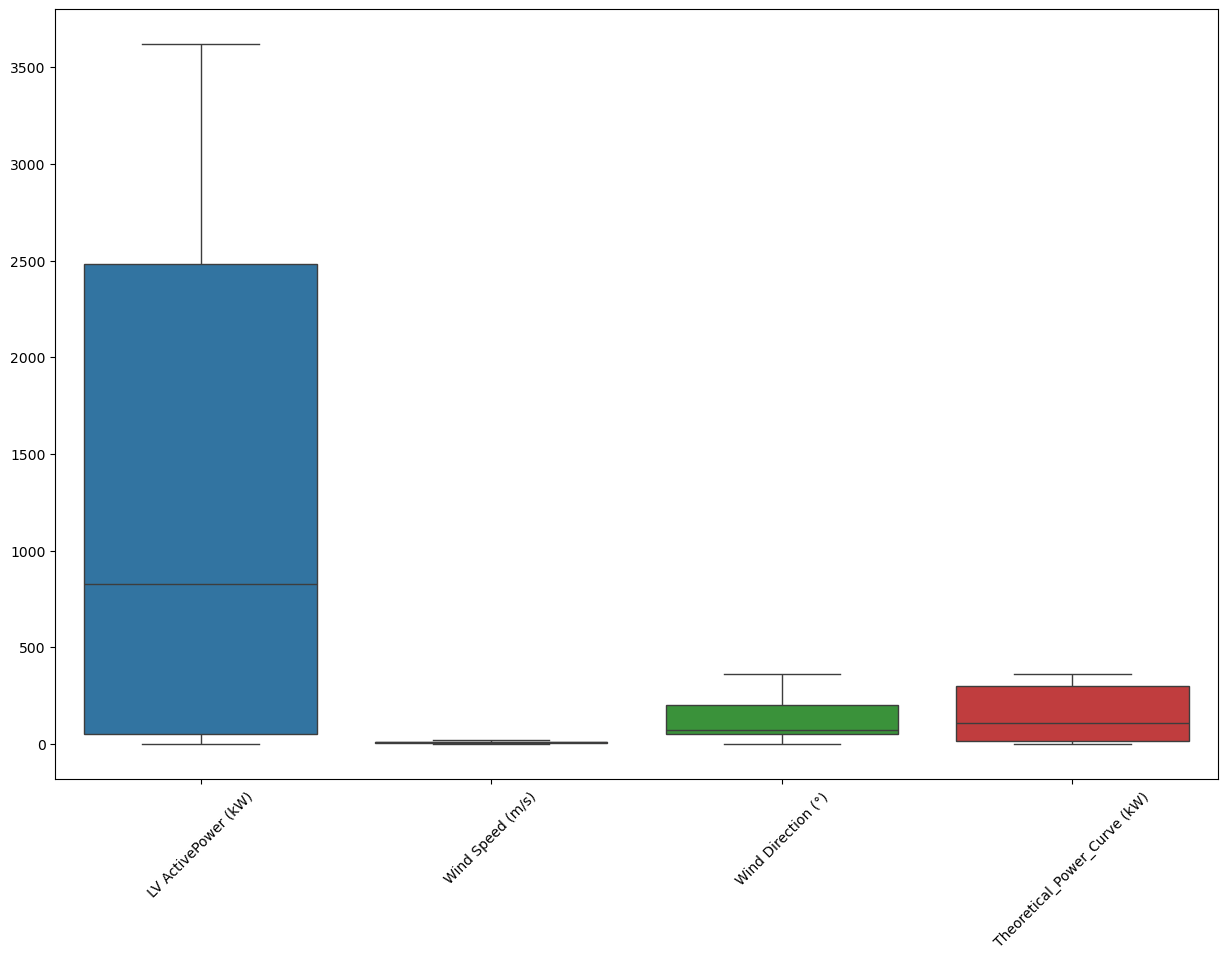

In [11]:
# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

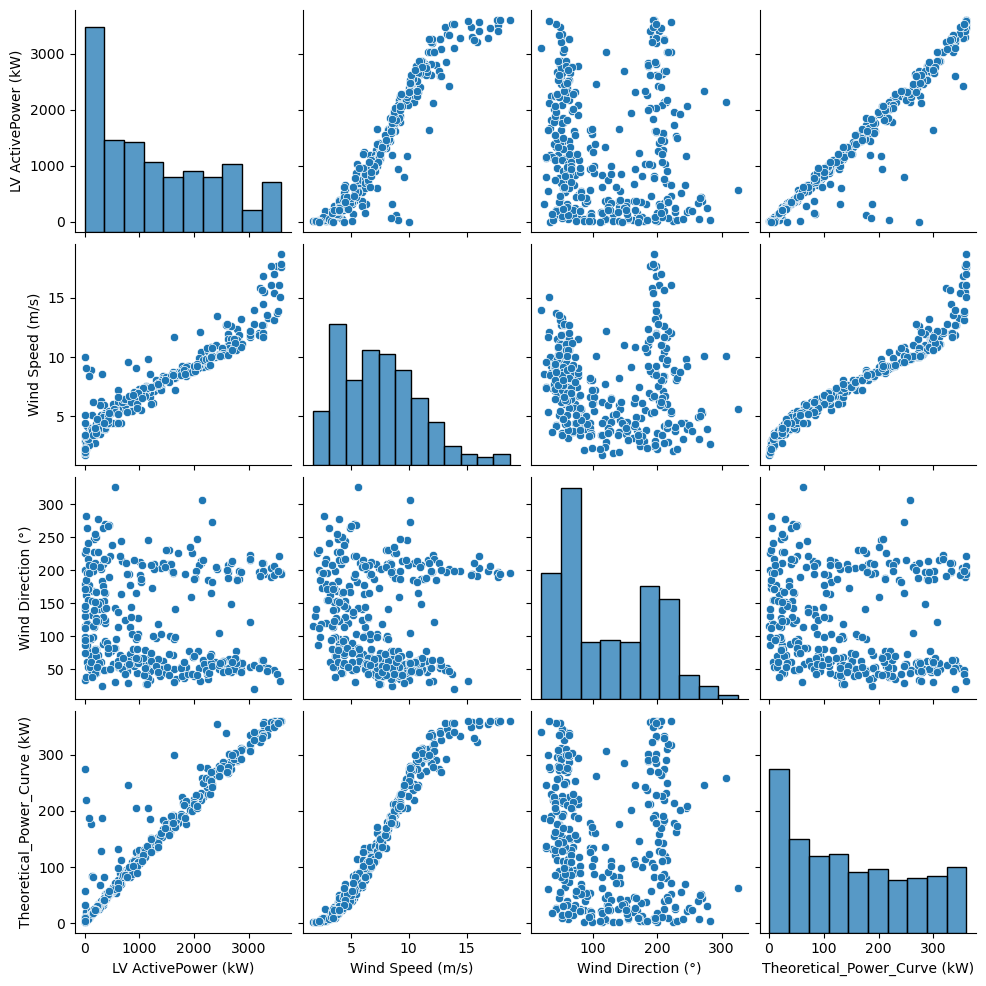

In [13]:
# Diagramas de dispersión (Scatter plots)
sns.pairplot(daily_avg)
plt.show()

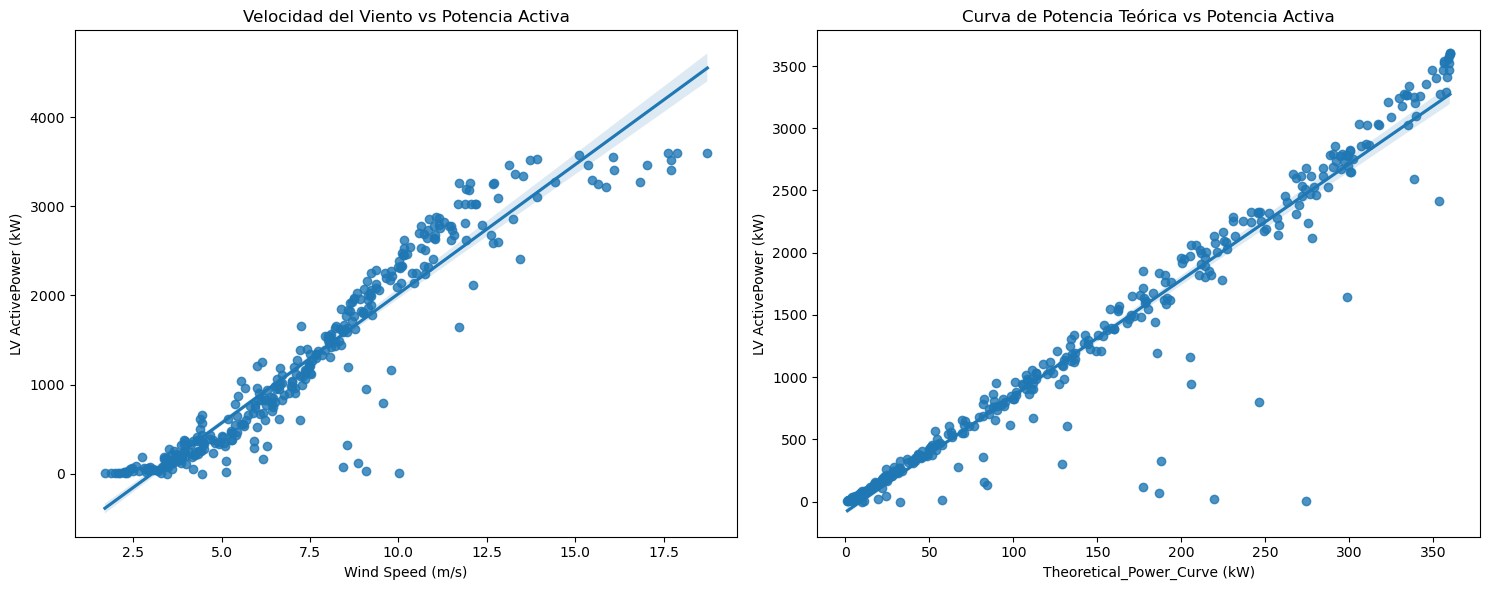

In [23]:
# --- 3. Dispersión suavizada ---
# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Diagrama de dispersión con línea de tendencia para 'Wind Speed (m/s)' vs 'LV ActivePower (kW)'
sns.regplot(x='Wind Speed (m/s)', y='LV ActivePower (kW)', data=daily_avg, ax=axes[0])
axes[0].set_title('Velocidad del Viento vs Potencia Activa')

# Diagrama de dispersión con línea de tendencia para 'Theoretical_Power_Curve (kW)' vs 'LV ActivePower (kW)'
sns.regplot(x='Theoretical_Power_Curve (kW)', y='LV ActivePower (kW)', data=daily_avg, ax=axes[1])
axes[1].set_title('Curva de Potencia Teórica vs Potencia Activa')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar la imagen combinada
plt.show()

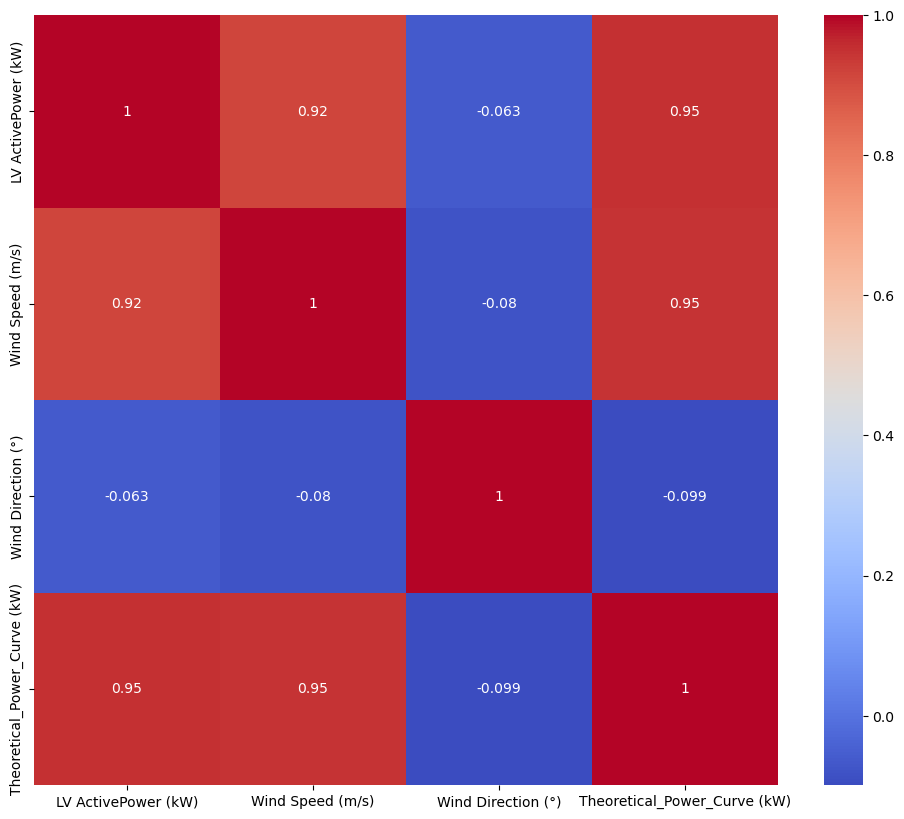

In [17]:
# Análisis de Correlación
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()